# A Whale off the Port(folio)

In [189]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

### Whale & Algorithmic Daily Returns

In [190]:
# Set the file paths

whale_returns = Path("whale_returns.csv")
algo_returns = Path("algo_returns.csv")

# Read CSV

wr_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
ar_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
wr_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [191]:
# Check for nulls (whale return)

wr_df.isnull().mean() * 100
wr_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [192]:
# Drop nulls

wr_df = wr_df.dropna().copy()

# Check nulls have been dropped

wr_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [193]:
# Check for nulls (algo return)

ar_df.isnull().mean() * 100
ar_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [194]:
# Drop nulls

ar_df = ar_df.dropna().copy()

# Check nulls have been dropped

ar_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

### S&P TSX 60 Daily Returns

In [195]:
# S&P TSX 60

sp_tsx_returns = Path("sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [196]:
# Check data types

sp_tsx_df.dtypes

Close    object
dtype: object

In [197]:
# Fix data types

sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$', '')
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',', '')
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype('float')
sp_tsx_df.head()

D:\Anaconda\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [198]:
# Calculate daily returns

sp_tsx_df.isnull().sum()
sp_tsx_returns = sp_tsx_df.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [199]:
# Drop nulls

sp_tsx_returns.dropna(inplace = True)
sp_tsx_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [200]:
# Rename `Close` Column to be specific to this portfolio.

sp_tsx_returns = sp_tsx_returns.rename(columns={"Close":"S&P TSX 60"})
sp_tsx_returns.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


### Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [95]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

combined_returns = pd.concat([wr_df, ar_df, sp_tsx_returns], axis="columns", join="inner")
combined_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


### Conduct Quantitative Analysis

<AxesSubplot:title={'center':'Daily returns across various portfolios'}, xlabel='Date', ylabel='% change'>

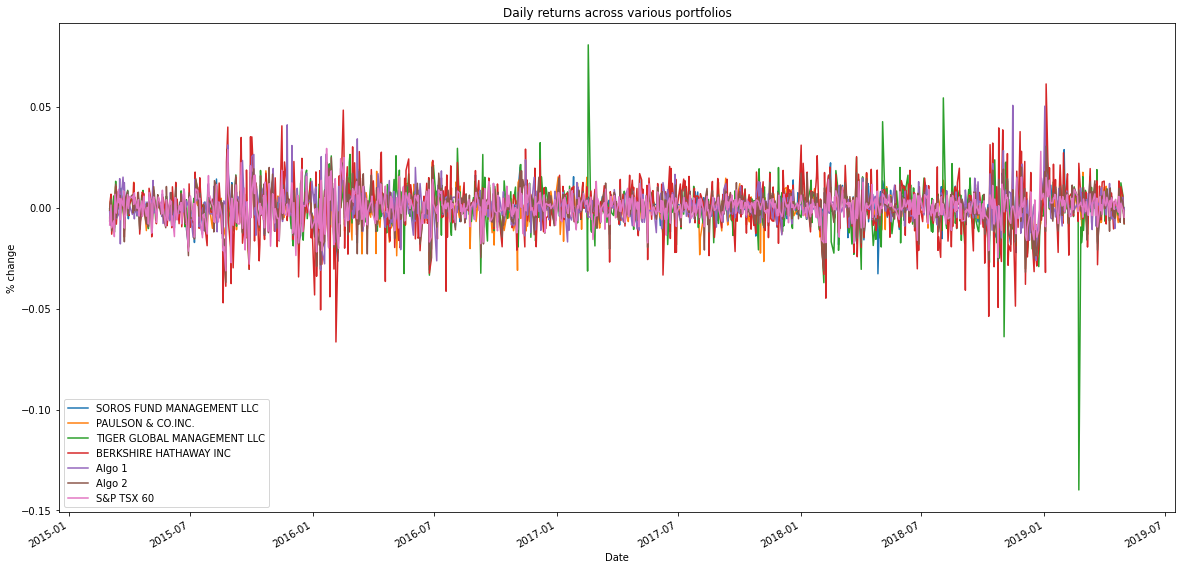

In [96]:
# Plot daily returns of all portfolios

combined_returns.plot(title = "Daily returns across various portfolios", ylabel = "% change", figsize = (20,10))

<AxesSubplot:title={'center':'Fund Performance Over Time'}, xlabel='Date'>

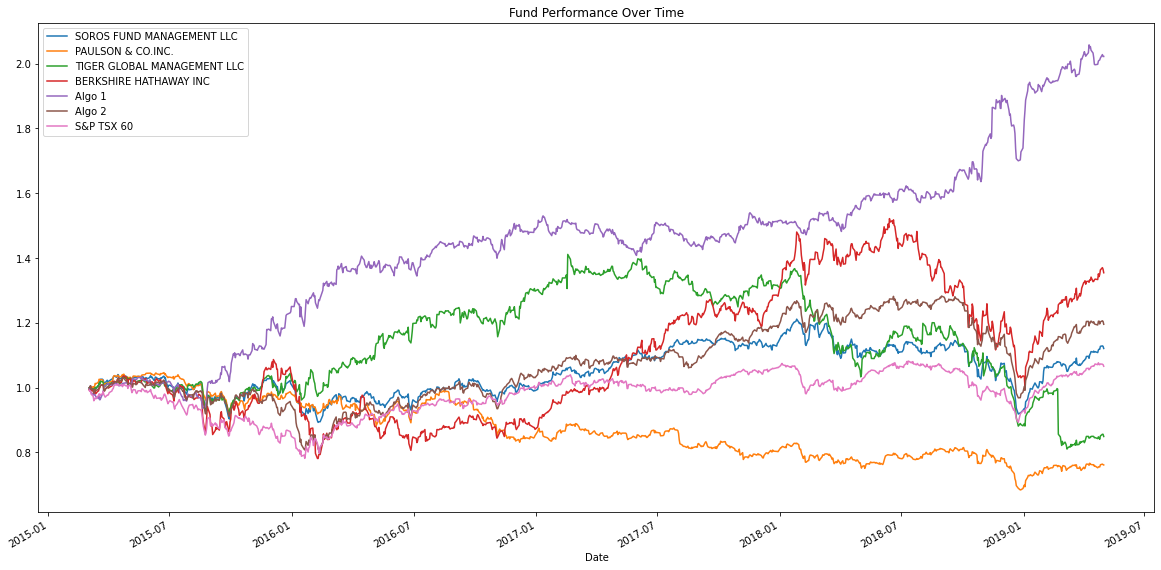

In [97]:
# Calculate cumulative returns of all portfolios

cumalative_combined_returns = (1 + combined_returns).cumprod()

# Plot cumulative returns

cumalative_combined_returns.plot(title = "Fund Performance Over Time", figsize = (20,10))

Most portfolios outperform the S&P TSX 60 apart from Tiger Global Management and the Paulson & Co fund.

### Risk Analysis

<AxesSubplot:>

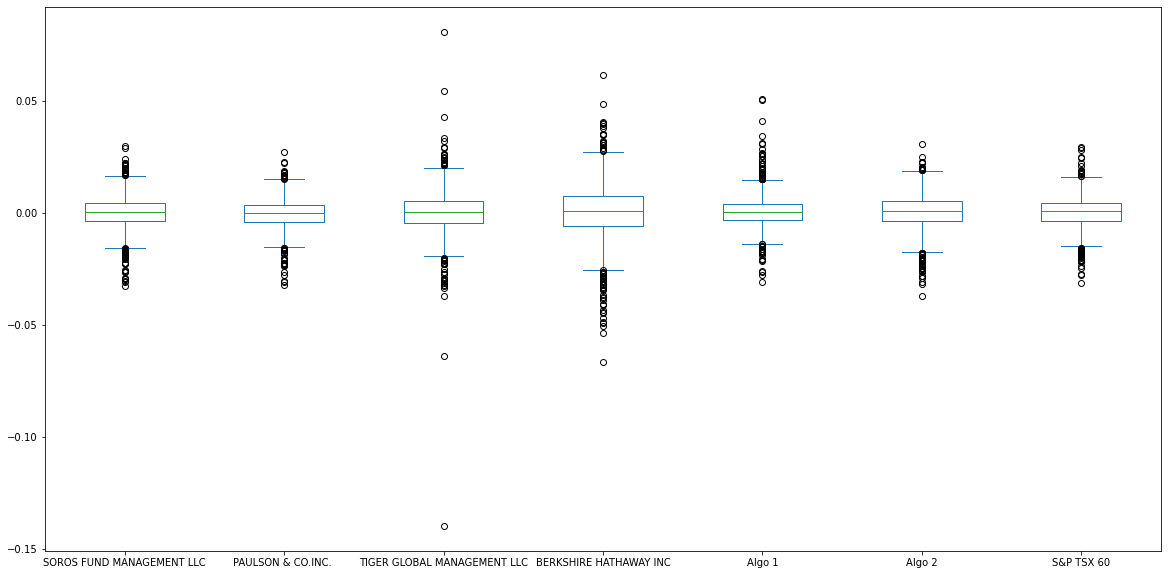

In [98]:
#Box plot

combined_returns.plot.box(figsize=(20,10))

In [99]:
# Calculate the daily standard deviations of all portfolios

daily_std = combined_returns.std()
daily_std


SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

In [100]:
# Determine which portfolios are riskier than the S&P TSX 60

risker_than_sp = [daily_std > daily_std['S&P TSX 60']]
risker_than_sp

[SOROS FUND MANAGEMENT LLC       True
 PAULSON & CO.INC.              False
 TIGER GLOBAL MANAGEMENT LLC     True
 BERKSHIRE HATHAWAY INC          True
 Algo 1                          True
 Algo 2                          True
 S&P TSX 60                     False
 dtype: bool]

Most portfolios are risker than S&P TSX 60 apart from Paulson & Co.

In [101]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std *np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

### Rolling Statistics

<AxesSubplot:xlabel='Date'>

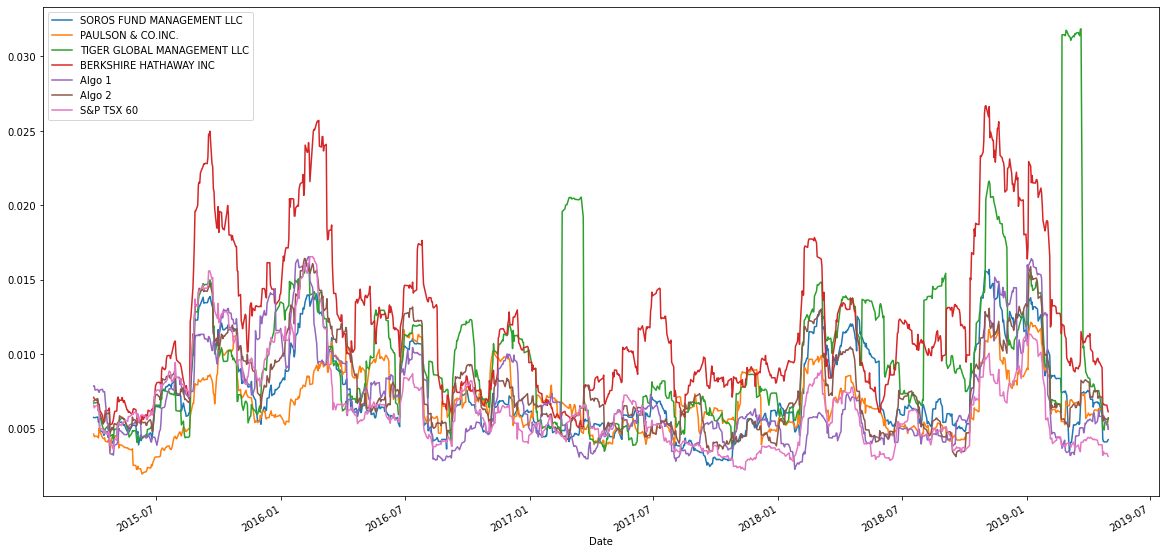

In [102]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_21_roll_std = combined_returns.rolling(window=21).std()

# Plot the rolling standard deviation

combined_21_roll_std.plot(figsize = (20,10))

<AxesSubplot:>

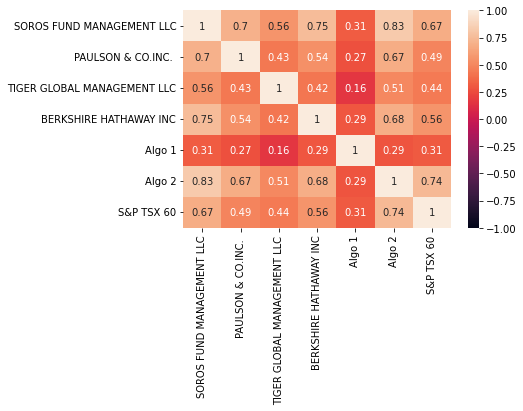

In [103]:
# Calculate the correlation

correlation = combined_returns.corr()
correlation.head()

# Display the correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1, annot = True)

Most correlated with the S&P TSX 60 is Algo 2 and then Soros Fund management.

<AxesSubplot:title={'center':'Rolling 60 day beta of Algo 1'}, xlabel='Date'>

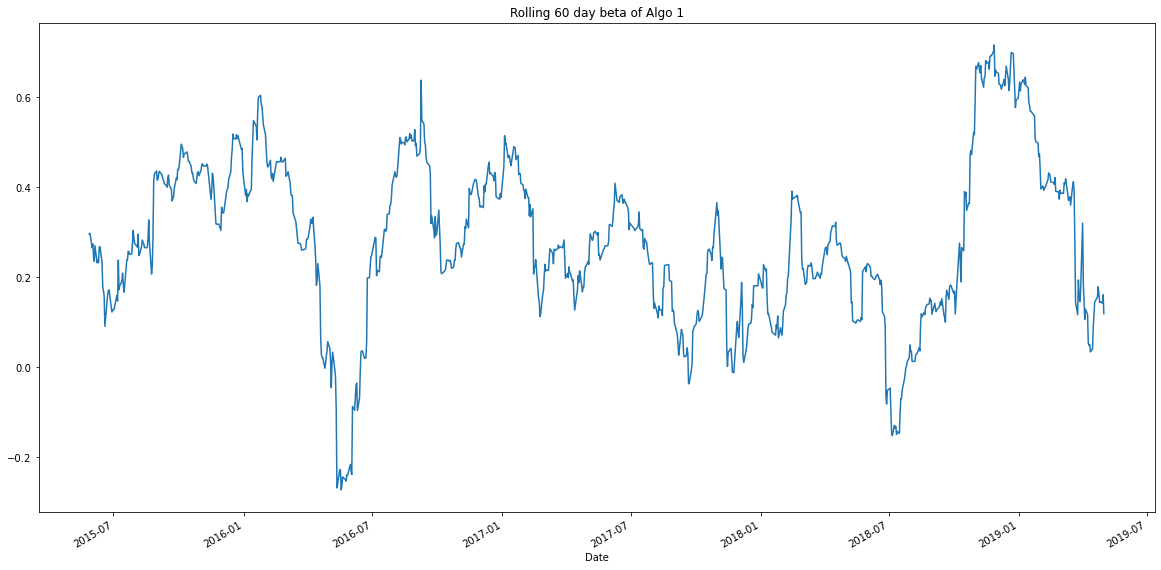

In [104]:
# Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

algo_1_cov = combined_returns["Algo 1"].rolling(window=60).cov(combined_returns["S&P TSX 60"])
var_SP = combined_returns["S&P TSX 60"].rolling(window=60).var()
beta = algo_1_cov/var_SP
beta.plot(title = "Rolling 60 day beta of Algo 1", figsize=(20,10))


### Sharpe Ratio

In [201]:
# Annualized sharpe ratio

sharpe_ratio = (combined_returns.mean()*252)/(combined_returns.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio across Funds'}>

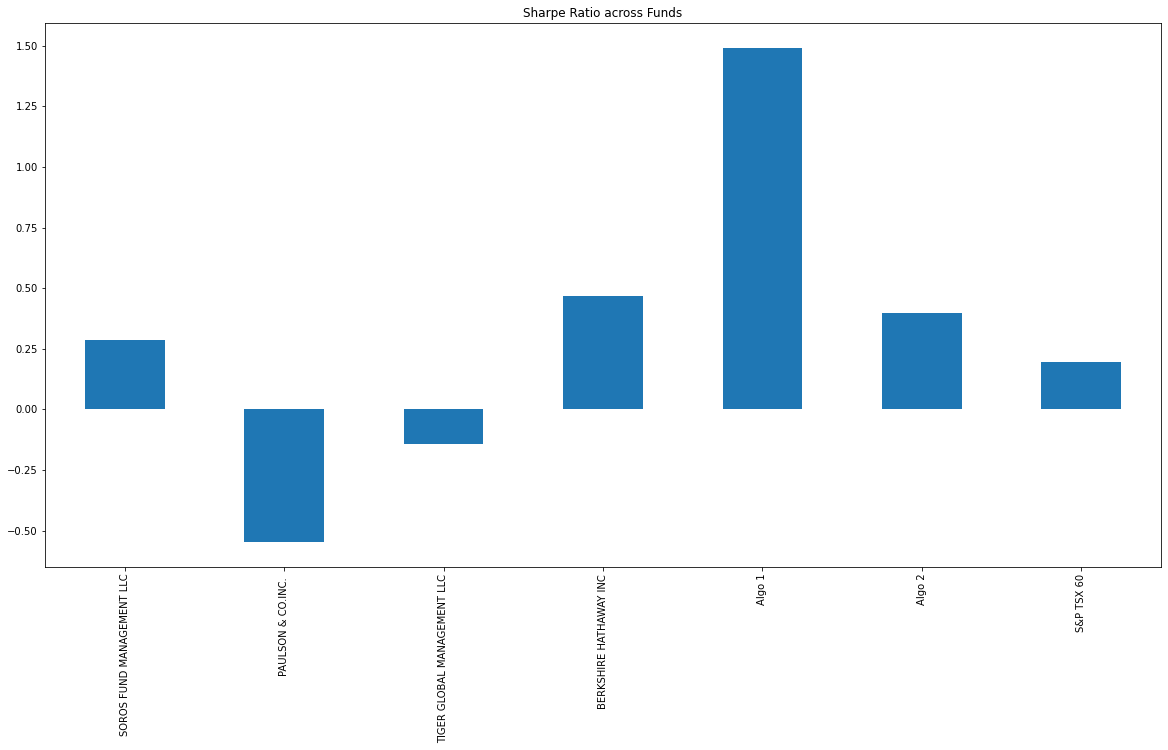

In [202]:
sharpe_ratio.plot.bar(title = "Sharpe Ratio across Funds",figsize = (20,10))

Both algorithmic strategies outperform the S&P TSX 60, as the Sharpe ratio is higher meaning the return to risk ratio is a lot better.

### Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [203]:
# Reading data from 1st stock

L_close = Path("l_historical.csv")

# Read CSV

L_df = pd.read_csv(L_close, index_col="Date", infer_datetime_format=True, parse_dates=True)
L_df.head()


,Close
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [156]:
# Reading data from 2nd stock

OTEX_close = Path("otex_historical.csv")

# Read CSV

OTEX_df = pd.read_csv(OTEX_close, index_col="Date", infer_datetime_format=True, parse_dates=True)
OTEX_df.head()

,Close
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [157]:
# Reading data from 3rd stock

SHOP_close = Path("shop_historical.csv")

# Read CSV

SHOP_df = pd.read_csv(SHOP_close, index_col="Date", infer_datetime_format=True, parse_dates=True)
SHOP_df.head()

,Close
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [158]:
# Combine all stocks in a single DataFrame

portfolio = pd.concat((L_df, OTEX_df, SHOP_df), axis = 1)
portfolio.head()

,Close,Close,Close
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [159]:
# Reorganize portfolio data by having a column per symbol

portfolio.columns = ["L", "OTEX", "SHOP"]
portfolio.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [160]:
 # Calculate daily returns

portfolio_returns = portfolio.pct_change()
portfolio_returns.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392


In [161]:
# Drop nulls

portfolio_returns.dropna(inplace = True)

# Display sample data

portfolio_returns.head()

,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


### Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [166]:
# Set weights & calculate portfolio return

weights = [1/3, 1/3, 1/3]

weighted_portfolio = portfolio_returns.dot(weights)

weighted_portfolio.head()


Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

### Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [165]:
# Join your returns DataFrame to the original returns DataFrame

combined_returns_2 = pd.concat([weighted_portfolio, wr_df, ar_df, sp_tsx_returns], axis="columns", join="inner")
combined_returns_2.rename(columns = {0:"My Portfolio"}, inplace = True)
combined_returns_2


,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,0.003461,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.003243,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.003303,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [167]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_returns_2.dropna(inplace = True)
combined_returns_2


,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,0.003461,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.003243,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.003303,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


###  Re-run the risk analysis with your portfolio to see how it compares to the others

In [168]:
# Calculate the annualized `std`


daily_std_2 = combined_returns_2.std()

annualized_std_2 = daily_std_2*np.sqrt(252)

annualized_std_2


My Portfolio                   0.224346
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX 60                     0.099121
dtype: float64

In [183]:
# Display daily std
daily_std_2

My Portfolio                   0.014132
SOROS FUND MANAGEMENT LLC      0.009177
PAULSON & CO.INC.              0.007203
TIGER GLOBAL MANAGEMENT LLC    0.013848
BERKSHIRE HATHAWAY INC         0.014328
Algo 1                         0.007561
Algo 2                         0.008672
S&P TSX 60                     0.006244
dtype: float64

In [184]:
# Determine which portfolios are riskier than my portfolio

risker_than_my_portfolio = [daily_std_2 > daily_std_2['My Portfolio']]
risker_than_my_portfolio

[My Portfolio                   False
 SOROS FUND MANAGEMENT LLC      False
 PAULSON & CO.INC.              False
 TIGER GLOBAL MANAGEMENT LLC    False
 BERKSHIRE HATHAWAY INC          True
 Algo 1                         False
 Algo 2                         False
 S&P TSX 60                     False
 dtype: bool]

<AxesSubplot:title={'center':'21 day rolling std'}, xlabel='Date'>

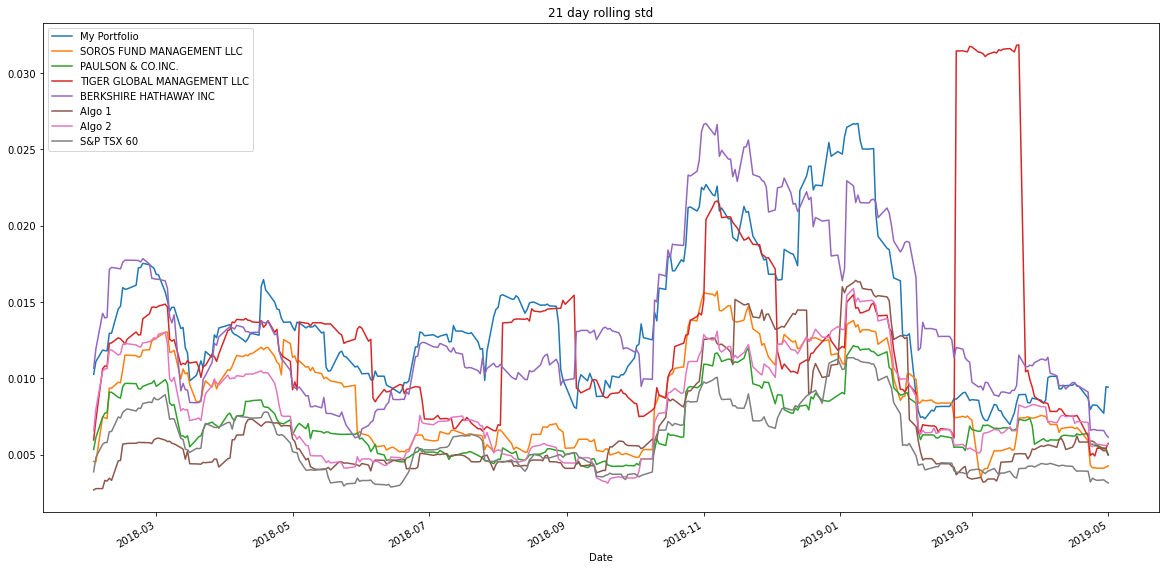

In [170]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_21_roll_std_2 = combined_returns_2.rolling(window=21).std()

# Plot the rolling standard deviation

combined_21_roll_std_2.plot(figsize = (20,10), title = "21 day rolling std")

<AxesSubplot:>

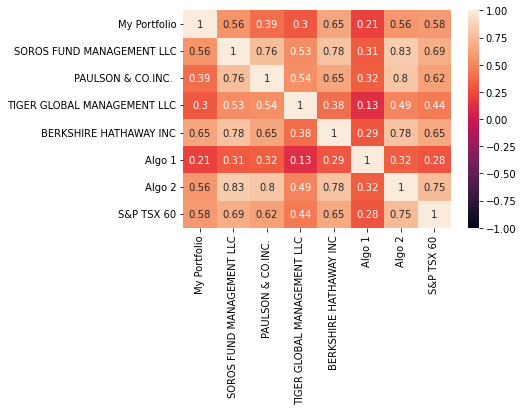

In [172]:
# Calculate and plot the correlation

correlation_2 = combined_returns_2.corr()
correlation_2.head()

# Display the correlation matrix

sns.heatmap(correlation_2, vmin=-1, vmax=1, annot = True)

<AxesSubplot:title={'center':'Rolling 60 day beta of My Portfolio'}, xlabel='Date'>

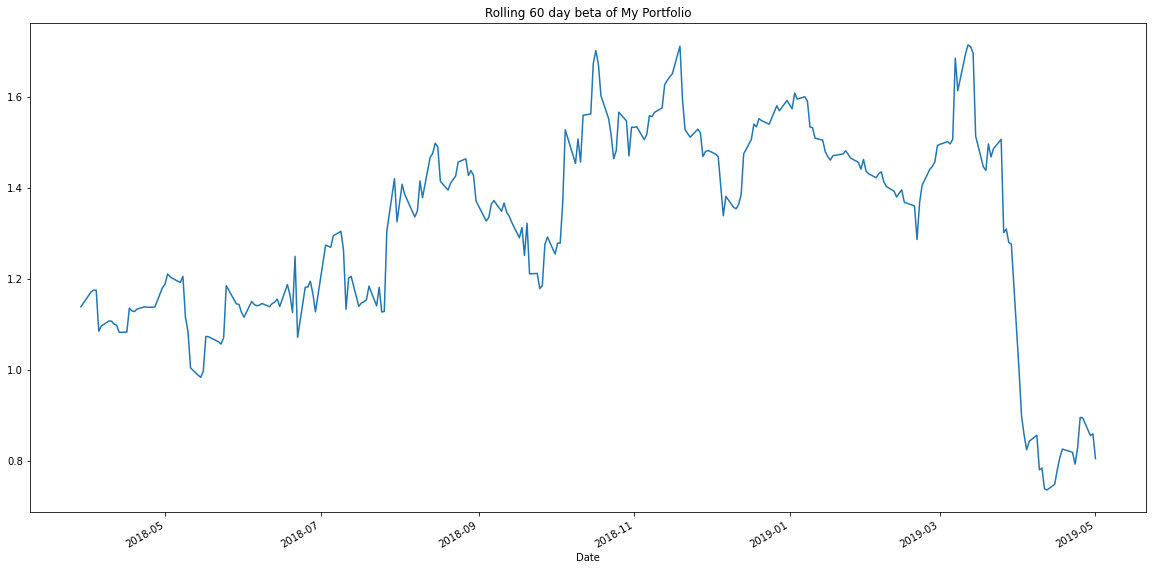

In [173]:
# Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

my_portfolio_cov = combined_returns_2["My Portfolio"].rolling(window=60).cov(combined_returns_2["S&P TSX 60"])
var_SP_2 = combined_returns_2["S&P TSX 60"].rolling(window=60).var()
beta_2 = my_portfolio_cov/var_SP_2
beta_2.plot(title = "Rolling 60 day beta of My Portfolio", figsize=(20,10))


In [174]:
# Calculate Annualized Sharpe Ratios

# Annualized sharpe ratio

sharpe_ratio_2 = (combined_returns_2.mean()*252)/(combined_returns_2.std()*np.sqrt(252))
sharpe_ratio_2

My Portfolio                   1.564547
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX 60                     0.034651
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio across Portfolios'}>

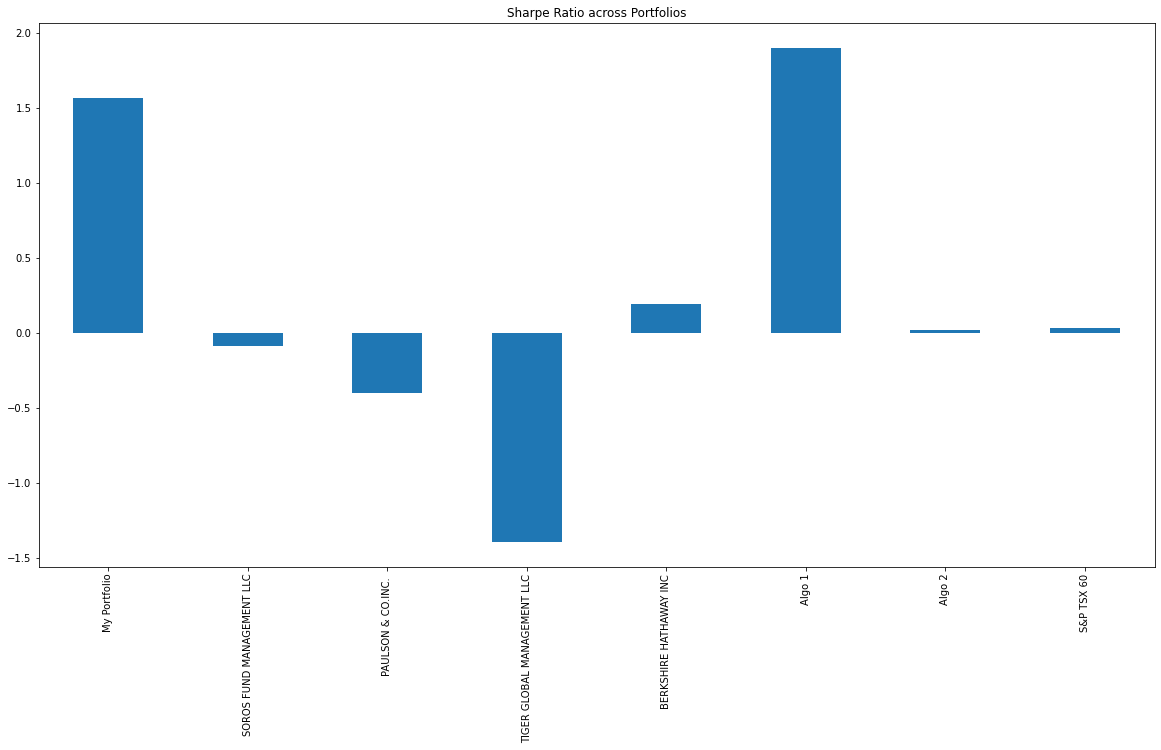

In [177]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio_2.plot.bar(title = "Sharpe Ratio across Portfolios",figsize = (20,10))

### Analysis

According to the sharpe ratio, the portfolio I have selected is 2nd best in terms of risk/reward ratio, only losing out closely to Algo 1 portfolio. From a correlation standpoint, my portfolio has the weakest correlation with Algo 1 which is quite surprising as both of these portfolios have very similar sharpe ratios when compared to the rest of the portfolios. Using the standard deviation we can see that only Berkishire Hathaway has a higher standard deviation meaning my portfolio is the 2nd riskiest portfolio of the lot. 